# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

# New Section

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings  # Suppressing warnings
warnings.filterwarnings('ignore')
import os


In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib as map
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.3
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet('C:/Users/my-pc/Downloads/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:/Users/my-pc/Downloads/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthdt = pd.read_parquet(file_path)

        monthdt["tpep_pickup_datetime"] = pd.to_datetime(monthdt["tpep_pickup_datetime"])
        monthdt["tpep_dropoff_datetime"] = pd.to_datetime(monthdt["tpep_dropoff_datetime"])


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampleddt = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        monthdt["pickup_date"] = monthdt["tpep_pickup_datetime"].dt.date
        monthdt["pickup_hour"] = monthdt["tpep_pickup_datetime"].dt.hour
            # Iterate through each hour of the selected date
        for date in monthdt['pickup_date'].unique():
            # Extract data for the current date
            dailydt = monthdt[monthdt['pickup_date'] == date]

            for hour in range(24):
                # Filter data for the current hour
                hourdt = dailydt[dailydt['pickup_hour'] == hour]
                # Sample 5% of the hourly data randomly
                sampledhourdt = hourdt.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampleddt = pd.concat([sampleddt, sampledhourdt], ignore_index=True)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampleddt], ignore_index=True)


    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
      

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [29]:
# Store the df in csv/parquet
df.to_parquet('C:/Users/my-pc/Downloads/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/DataFrame.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [149]:
# Load the new data file
file_path = 'C:/Users/my-pc/Downloads/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/DataFrame.parquet'


df = pd.read_parquet(file_path)


In [150]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [152]:
# Fix the index and drop any columns that are not needed

df = df.reset_index(drop=True)

dropcolumns = ['store_and_fwd_flag']

df = df.drop(columns=dropcolumns, axis=1)


df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date pickup_hour  \
0         41.15                   0.0         1.25   2023-01-01           0   
1         15.48                   2.5         0.00   2023-01-01           0   
2         16.40                   2.5         0.00   2023-01-01           0   
3         11.50                   2.5         0.00   2023-01-01           0   
4         35.57                   NaN          NaN   2023-01-01           0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [153]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'] + df['Airport_fee']

df.drop(columns=['Airport_fee'], axis=1)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 7.74         1.0           138           256             2   
1                 1.24         1.0           161           237             1   
2                 1.44         1.0           237           141             2   
3                 0.54         1.0           143           142             2   
4                19.24         NaN            66           107             0   
...                ...         ...           ...           ...           ...   
1896395           0.79         1.0           231           231             1   
1896396           0.50         1.0           158            68             1   
1896397           1.09         1.0           161           162             1   
1896398          13.20         1.0           164            14             2   
1896399           2.97         1.0           231            68             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              32.40    6.0      0.5        0.00           0.0   
1               7.90    1.0      0.5        2.58           0.0   
2              11.40    1.0      0.5        0.00           0.0   
3               6.50    1.0      0.5        0.00           0.0   
4              25.64    0.0      0.5        5.93           0.0   
...              ...    ...      ...         ...           ...   
1896395         8.60    1.0      0.5        2.00           0.0   
1896396         5.80    3.5      0.5        2.15           0.0   
1896397         9.30    1.0      0.5        2.86           0.0   
1896398        54.80    3.5      0.5        0.00           0.0   
1896399        17.00    1.0      0.5        4.40           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         41.15                   0.0   
1                          1.0         15.48                   2.5   
2                          1.0         16.40                   2.5   
3                          1.0         11.50                   2.5   
4                          1.0         35.57                   NaN   
...                        ...           ...                   ...   
1896395                    1.0         15.60                   2.5   
1896396                    1.0         12.95                   2.5   
1896397                    1.0         17.16                   2.5   
1896398                    1.0         59.80                   2.5   
1896399                    1.0         26.40                   2.5   

         airport_fee pickup_date  pickup_hour  
0                NaN  2023-01-01            0  
1                NaN  2023-01-01            0  
2                NaN  2023-01-01            0  
3                NaN  2023-01-01            0  
4                NaN  2023-01-01            0  
...              ...         ...          ...  
1896395          NaN  2023-09-30           23  
1896396          NaN  2023-09-30           23  
1896397  

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [154]:
# check where values of fare amount are negative
negativefare = df[df['fare_amount']<0]
##print(negative_fare_df)
negativefare.head()


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour, Airport_fee]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?
# Due to absence of negative fare amounts the relationship is lost

In [155]:
# Analyse RatecodeID for the negative fare amounts

RatecodeIDnegative = negativefare['RatecodeID'].value_counts()
print(RatecodeIDnegative)

Series([], Name: count, dtype: int64)


In [156]:
# Find which columns have negative values
columnsnum = df.select_dtypes(include=['number'])

negativecols = (columnsnum < 0).any()

negativevalues = negativecols[negativecols == True].index.tolist()

print(negativevalues)


['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [157]:
# fix these negative values

df[columnsnum.columns] = columnsnum.where(columnsnum >= 0, 0)
droppedrows = df[(df[negativevalues] < 0).any(axis=1)].index
positive = df.drop(index=droppedrows).reset_index(drop=True)

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              0.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         0.0            66           107             0   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date pickup_hour  \
0         41.15                   0.0          0.0   2023-01-01           0   
1         15.48                   2.5          0.0   2023-01-01           0   
2         16.40                   2.5          0.0   2023-01-01           0   
3         11.50                   2.5          0.0   2023-01-01           0   
4         35.57                   0.0          0.0   2023-01-01           0   

   Airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 21 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [158]:
# Find the proportion of missing values in each column

missingvalues = df.isnull().mean()

print(missingvalues)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
pickup_date              0.0
pickup_hour              0.0
Airport_fee              0.0
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [159]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
nullvalues = df[df.isnull().any(axis=1)]

#print(rows_with_null_values)
nullvalues.head()

positive['passenger_count'] = positive['passenger_count'].fillna(positive['passenger_count'].mode()[0])

df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              0.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         0.0            66           107             0   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date pickup_hour  \
0         41.15                   0.0          0.0   2023-01-01           0   
1         15.48                   2.5          0.0   2023-01-01           0   
2         16.40                   2.5          0.0   2023-01-01           0   
3         11.50                   2.5          0.0   2023-01-01           0   
4         35.57                   0.0          0.0   2023-01-01           0   

   Airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 21 columns]

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [160]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(0)

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              0.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         0.0            66           107             0   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date pickup_hour  \
0         41.15                   0.0          0.0   2023-01-01           0   
1         15.48                   2.5          0.0   2023-01-01           0   
2         16.40                   2.5          0.0   2023-01-01           0   
3         11.50                   2.5          0.0   2023-01-01           0   
4         35.57                   0.0          0.0   2023-01-01           0   

   Airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 21 columns]

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [161]:
# handle null values in congestion_surcharge

congestion_surcharge = df['congestion_surcharge'].median()
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(congestion_surcharge)

df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              0.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         0.0            66           107             0   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date pickup_hour  \
0         41.15                   0.0          0.0   2023-01-01           0   
1         15.48                   2.5          0.0   2023-01-01           0   
2         16.40                   2.5          0.0   2023-01-01           0   
3         11.50                   2.5          0.0   2023-01-01           0   
4         35.57                   0.0          0.0   2023-01-01           0   

   Airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 21 columns]

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [162]:
# Handle any remaining missing values
df.fillna(0, inplace=True)

df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              0.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         0.0            66           107             0   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date pickup_hour  \
0         41.15                   0.0          0.0   2023-01-01           0   
1         15.48                   2.5          0.0   2023-01-01           0   
2         16.40                   2.5          0.0   2023-01-01           0   
3         11.50                   2.5          0.0   2023-01-01           0   
4         35.57                   0.0          0.0   2023-01-01           0   

   Airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 21 columns]

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [163]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print(df.describe(include='all'))

#Check for Negative or Zero Values
negative = ['fare_amount', 'tip_amount', 'trip_distance', 'total_amount', 
                    'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 
                    'congestion_surcharge', 'airport_fee']
negativevalues = df[negative].lt(0).sum()
print(negativevalues)

zeros = df[['trip_distance', 'passenger_count']].eq(0).sum()
zeros.head()

long_trip = df[df['trip_distance'] > 10000]
print(long_trip)

passenger_count = df[(df['passenger_count'] < 1) | (df['passenger_count'] > 6)]
passenger_count.head()

            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   1.896400e+06                     1896400                     1896400   
unique           NaN                         NaN                         NaN   
top              NaN                         NaN                         NaN   
freq             NaN                         NaN                         NaN   
mean    1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min     1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%     1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%     2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%     2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max     6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std     4.476401e-01                         NaN                         NaN   

        passenger_count  trip_distance 

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              0.0   
15         2  2023-01-01 00:41:50   2023-01-01 01:14:50              0.0   
42         2  2023-01-01 00:37:21   2023-01-01 00:54:18              0.0   
43         2  2023-01-01 00:44:03   2023-01-01 01:13:49              0.0   
46         2  2023-01-01 00:50:55   2023-01-01 01:19:06              0.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4           19.24         0.0            66           107             0   
15          10.77         0.0           151           106             0   
42           4.52         0.0           114           262             0   
43           9.19         0.0           239           256             0   
46           2.74         0.0            90            48             0   

    fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
4         25.64  ...      0.5        5.93          0.00   
15        45.38  ...      0.5       11.19          6.55   
42        25.38  ...      0.5        0.00          0.00   
43        40.00  ...      0.5        2.20          0.00   
46        18.48  ...      0.5        3.37          0.00   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
4                     1.0         35.57                   0.0          0.0   
15                    1.0         67.12                   0.0          0.0   
42                    1.0         29.38                   0.0          0.0   
43                    1.0         46.20                   0.0          0.0   
46                    1.0         25.85                   0.0          0.0   

    pickup_date pickup_hour  Airport_fee  
4    2023-01-01           0          0.0  
15   2023-01-01           0          0.0  
42   2023-01-01           0          0.0  
43   2023-01-01           0          0.0  
46   2023-01-01           0          0.0  

[5 rows x 21 columns]

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [164]:
# remove passenger_count > 6
outliers = positive[positive['passenger_count'] > 6].index
df_inliers = positive.drop(index = outliers).reset_index(drop = True)



In [165]:
# Continue with outlier handling

positiveindex = positive[(positive['trip_distance'] < 1) & (positive['fare_amount'] > 300)].index

#Handle Zero Values in `trip_distance` or `passenger_count`
positive = positive[(positive['trip_distance'] > 0) & (positive['passenger_count'] > 0)]

# Handle Long Trip Distances (greater than 10,000 miles)
positive = positive[positive['trip_distance'] <= 10000]

# Handle Abnormal Passenger Counts (less than 1 or greater than 6)
positive = positive[(positive['passenger_count'] >= 1) & (positive['passenger_count'] <= 6)]

Q1 = positive[['fare_amount','total_amount','trip_distance','tip_amount',]].quantile(0.25)
Q3 = positive[['fare_amount','total_amount','trip_distance','tip_amount',]].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['fare_amount']>upper_bound['fare_amount'])|(df['total_amount']>upper_bound['total_amount']) |(df['trip_distance']>upper_bound['trip_distance']) |(df['tip_amount']>upper_bound['tip_amount']) )]

df = df.reset_index(drop=True)

df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
2         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
3         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
4         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.24         1.0           161           237             1   
1           1.44         1.0           237           141             2   
2           0.54         1.0           143           142             2   
3           1.59         1.0            79           164             1   
4           3.16         1.0            79           256             1   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0          7.9  ...      0.5        2.58           0.0                    1.0   
1         11.4  ...      0.5        0.00           0.0                    1.0   
2          6.5  ...      0.5        0.00           0.0                    1.0   
3         11.4  ...      0.5        3.28           0.0                    1.0   
4         19.1  ...      0.5        6.02           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date pickup_hour  \
0         15.48                   2.5          0.0   2023-01-01           0   
1         16.40                   2.5          0.0   2023-01-01           0   
2         11.50                   2.5          0.0   2023-01-01           0   
3         19.68                   2.5          0.0   2023-01-01           0   
4         30.12                   2.5          0.0   2023-01-01           0   

   Airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 21 columns]

In [166]:
# Do any columns need standardising?
'I do not think so'


'I do not think so'

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [167]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

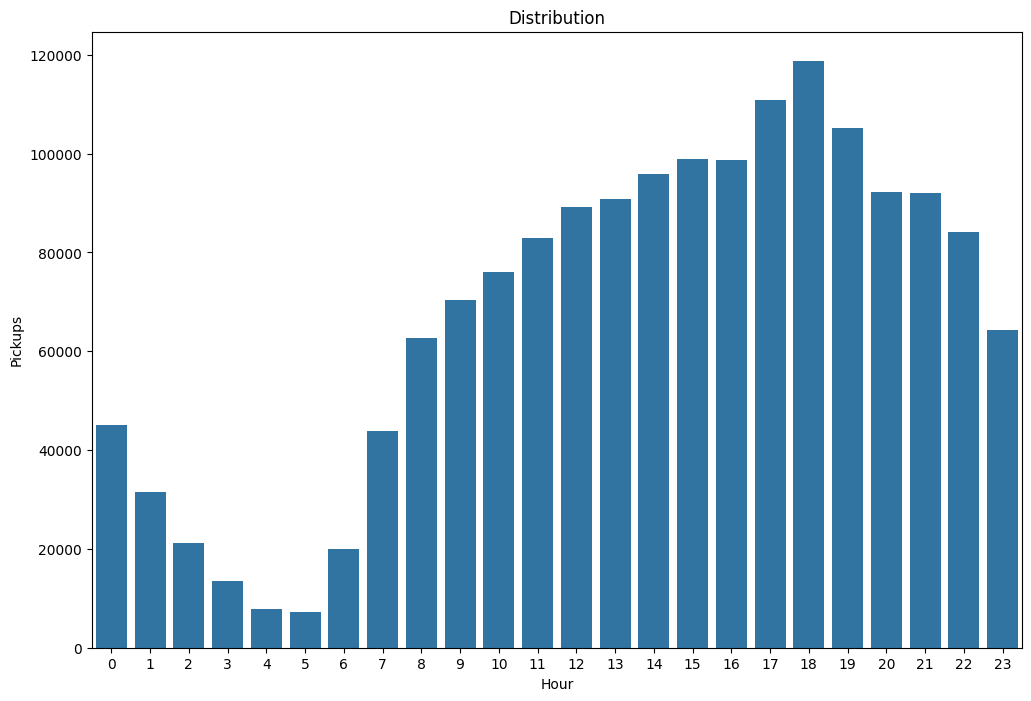

In [168]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek 
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month  

plt.figure(figsize=(12, 8))
sns.countplot(x='pickup_hour', data=df)
plt.title('Distribution')
plt.xlabel('Hour')
plt.ylabel('Pickups')
plt.xticks(range(0, 24))
plt.show()

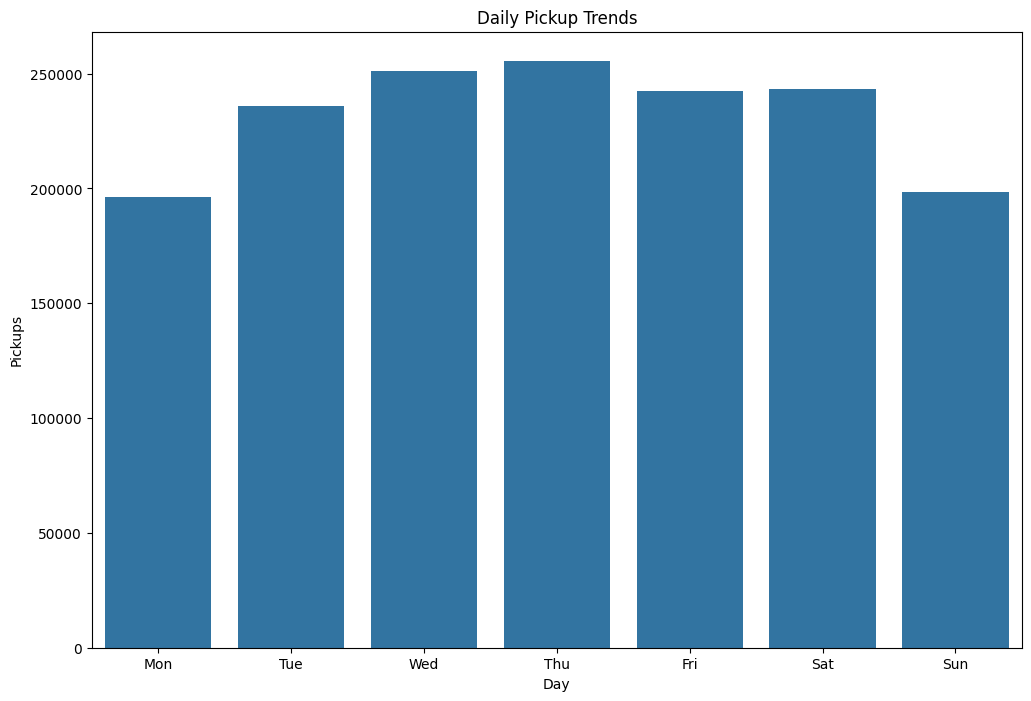

In [169]:
# Find and show the daily trends in taxi pickups (days of the week)
trends = df['pickup_day_of_week'].value_counts().sort_index()

# 0=Monday, 6=Sunday
plt.figure(figsize=(12, 8))
sns.barplot(x=trends.index, y=trends.values)
plt.title('Daily Pickup Trends')
plt.xlabel('Day')
plt.ylabel('Pickups')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


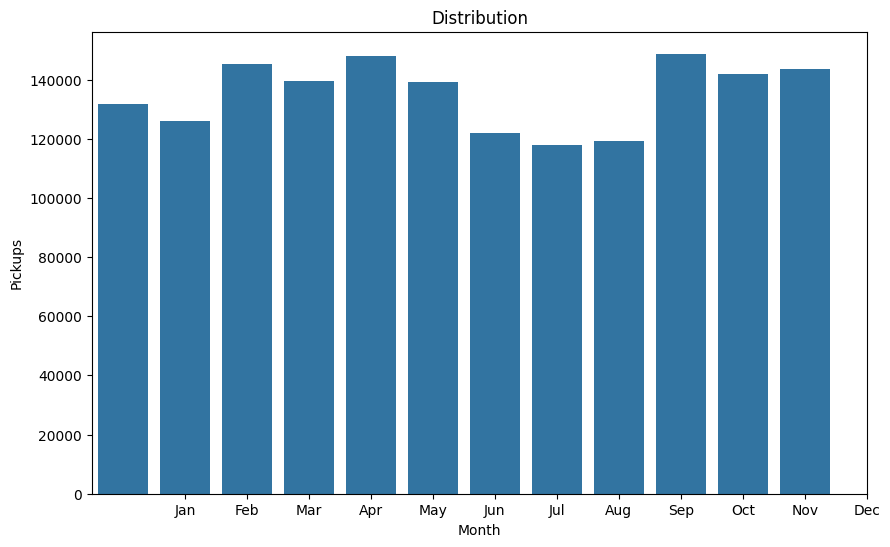

In [170]:
# Show the monthly trends in pickups

plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_month', data=df)
plt.title('Distribution')
plt.xlabel('Month')
plt.ylabel('Pickups')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [171]:
# Analyse the above parameters

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_columns:
    print("Negative values in {} : {}".format(col, (df[col] < 0).sum()))

# Check for zero values in the financial parameters
for col in financial_columns:
    print("Zero values in {} : {}".format(col, (df[col] == 0).sum()))

Negative values in fare_amount : 0
Negative values in tip_amount : 0
Negative values in total_amount : 0
Negative values in trip_distance : 0
Zero values in fare_amount : 564
Zero values in tip_amount : 366662
Zero values in total_amount : 356
Zero values in trip_distance : 30619


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [172]:
#Yes 

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [173]:
#It is beneficial in the financial perspective to analyze cases that are adding value

In [174]:
# Create a df with non zero entries for the selected parameters.

nonzero = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0) 
]

print(nonzero.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
4         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
5         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
7         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.24         1.0           161           237             1   
3           1.59         1.0            79           164             1   
4           3.16         1.0            79           256             1   
5           0.90         1.0           148           114             1   
7           2.78         1.0            79           186             1   

   fare_amount  ...  tolls_amount  improvement_surcharge  total_amount  \
0          7.9  ...           

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

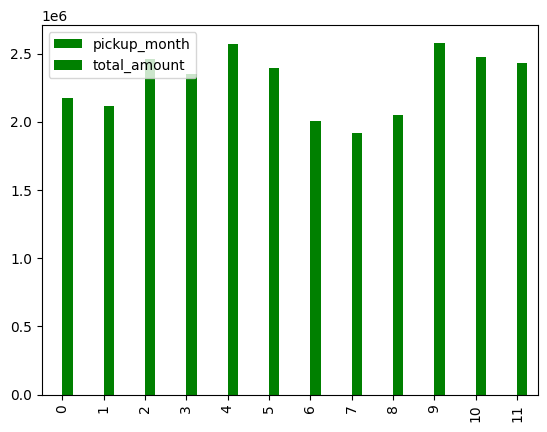

In [175]:
# Group data by month and analyse monthly revenue
monthly_revenue = nonzero.groupby('pickup_month', as_index = False)['total_amount'].sum()
monthly_revenue.plot(kind='bar', color='green')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

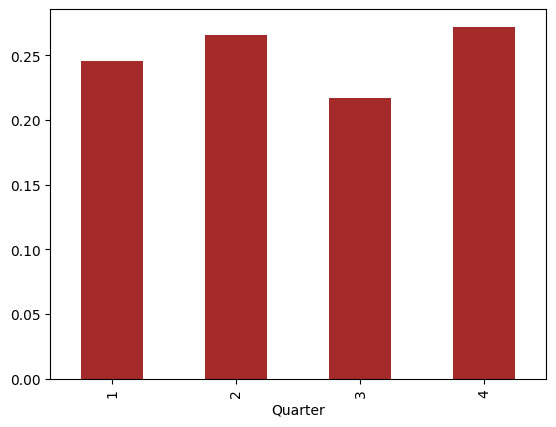

In [176]:
# Calculate proportion of each quarter
nonzero["Quarter"] = nonzero["tpep_pickup_datetime"].dt.quarter
quarterly = nonzero.groupby("Quarter")["total_amount"].sum()
quarterly.value_counts
quarterly_proportion = quarterly / quarterly.sum()
quarterly_proportion.plot(kind='bar', color='brown')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

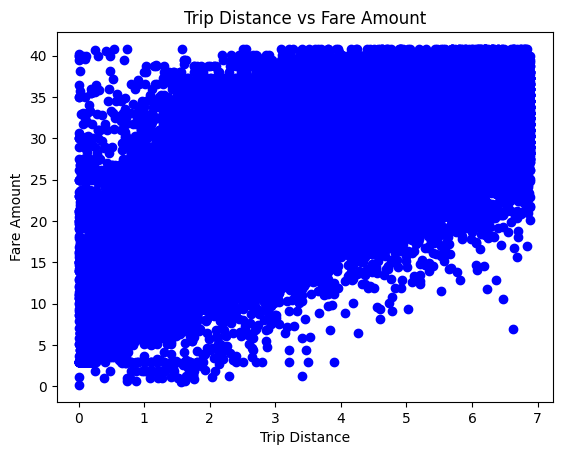

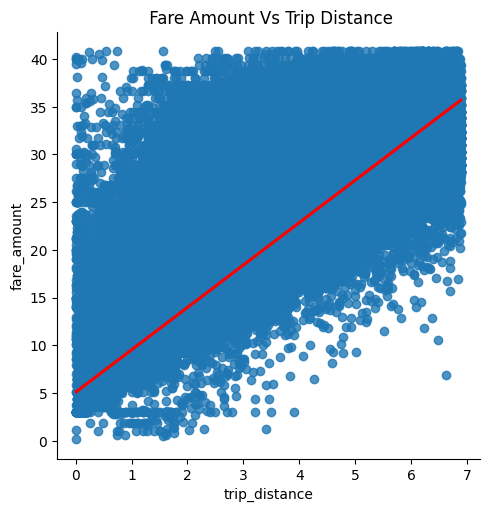

In [177]:
# Show how trip fare is affected by distance
plt.scatter(nonzero['trip_distance'], nonzero['fare_amount'], color='blue')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs Fare Amount')
plt.show()
correlation = nonzero['trip_distance'].corr(nonzero['fare_amount'])
sns.lmplot(x='trip_distance', y='fare_amount', data=nonzero, line_kws={'color': 'red'})
plt.title(' Fare Amount Vs Trip Distance')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

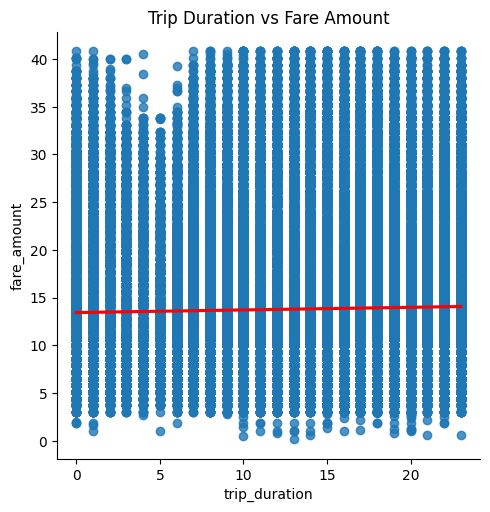

In [178]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
nonzero['trip_duration'] = nonzero['pickup_hour']
correlation = nonzero['trip_duration'].corr(nonzero['fare_amount'])
sns.lmplot(x='trip_duration', y='fare_amount', data=nonzero, line_kws={'color': 'red'})
plt.title('Trip Duration vs Fare Amount')
plt.show()


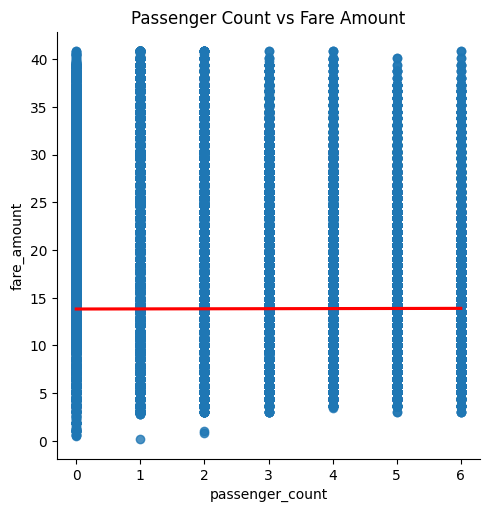

In [179]:
# Show relationship between fare and number of passengers
correlation = nonzero['passenger_count'].corr(nonzero['fare_amount'])
sns.lmplot(x='passenger_count', y='fare_amount', data=nonzero, line_kws={'color': 'red'})
plt.title('Passenger Count vs Fare Amount')
plt.show()


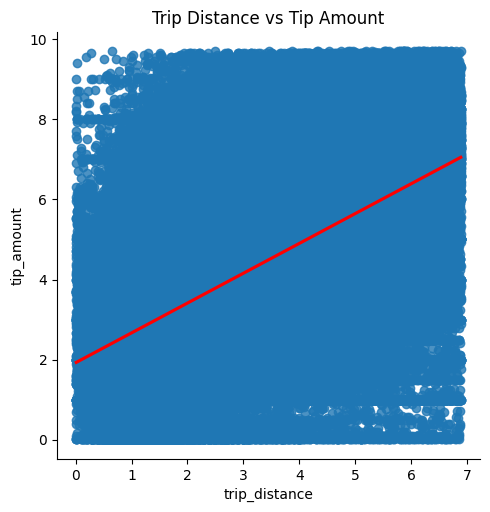

In [180]:
# Show relationship between tip and trip distance
correlation = nonzero['trip_distance'].corr(nonzero['tip_amount'])
sns.lmplot(x='trip_distance', y='tip_amount', data=nonzero, line_kws={'color': 'red'})
plt.title('Trip Distance vs Tip Amount')
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

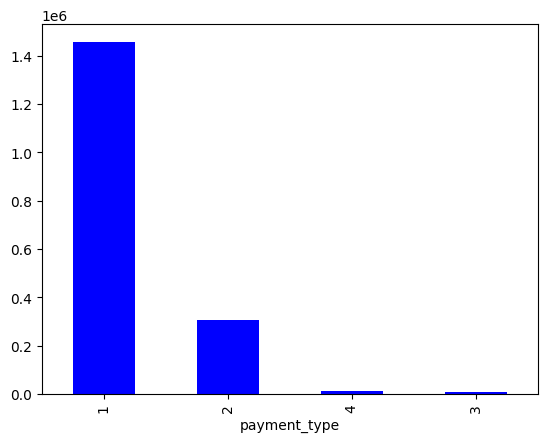

In [181]:
# Analyse the distribution of different payment types (payment_type).
payment_type = positive['payment_type'].value_counts()

payment_type.plot(kind='bar', color='blue')
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [182]:
!pip3 install geopandas


[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [183]:
import geopandas as gpd

zones = gpd.read_file('C:/Users/my-pc/Downloads/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp')

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

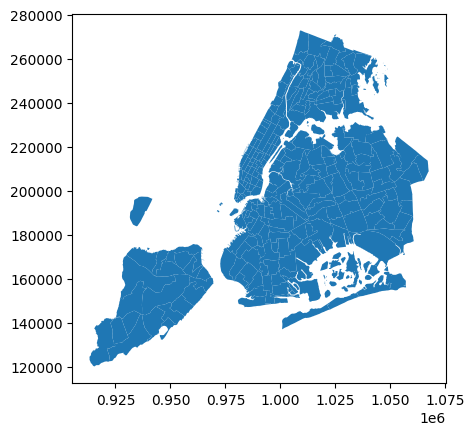

In [184]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [185]:
# Merge zones and trip records using locationID and PULocationID
mergeddata = df.merge(zones, left_on = 'PULocationID',right_on = 'LocationID', how = 'left')

mergeddata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623197 entries, 0 to 1623196
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1623197 non-null  int64         
 1   tpep_pickup_datetime   1623197 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1623197 non-null  datetime64[us]
 3   passenger_count        1623197 non-null  float64       
 4   trip_distance          1623197 non-null  float64       
 5   RatecodeID             1623197 non-null  float64       
 6   PULocationID           1623197 non-null  int64         
 7   DOLocationID           1623197 non-null  int64         
 8   payment_type           1623197 non-null  int64         
 9   fare_amount            1623197 non-null  float64       
 10  extra                  1623197 non-null  float64       
 11  mta_tax                1623197 non-null  float64       
 12  tip_amount             16231

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [186]:
# Group data by location and calculate the number of trips

tripsbylocation = mergeddata.groupby('zone').size().reset_index(name='trip_count')

tripsbylocation.head()

zone  trip_count
0  Allerton/Pelham Gardens          29
1            Alphabet City        2194
2  Arrochar/Fort Wadsworth          20
3                  Astoria         895
4             Astoria Park           3

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [187]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(tripsbylocation)

zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
2         4    0.043567    0.000112            Alphabet City           4   
3         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
4         7    0.107417    0.000390                  Astoria           7   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
2      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
3  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   
4         Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...   

   trip_count  
0          43  
1          29  
2        2194  
3          20  
4         895

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

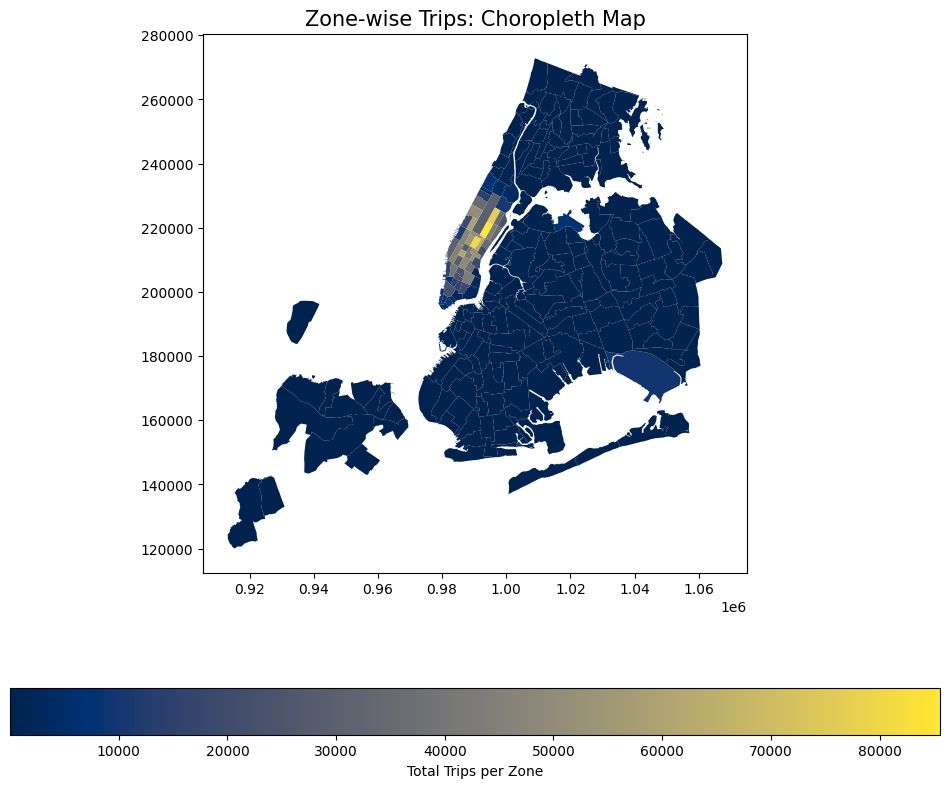

In [188]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(column='trip_count', cmap='cividis', ax=ax, legend=True,
                      legend_kwds={'label': "Total Trips per Zone", 'orientation': "horizontal"})

ax.set_title('Zone-wise Trips: Choropleth Map', fontsize=15)
plt.show()



In [189]:
# can you try displaying the zones DF sorted by the number of trips?

zones = zones.sort_values(by='trip_count', ascending=False)

zones[['zone', 'trip_count']].head(10)

mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623197 entries, 0 to 1623196
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1623197 non-null  int64         
 1   tpep_pickup_datetime   1623197 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1623197 non-null  datetime64[us]
 3   passenger_count        1623197 non-null  float64       
 4   trip_distance          1623197 non-null  float64       
 5   RatecodeID             1623197 non-null  float64       
 6   PULocationID           1623197 non-null  int64         
 7   DOLocationID           1623197 non-null  int64         
 8   payment_type           1623197 non-null  int64         
 9   fare_amount            1623197 non-null  float64       
 10  extra                  1623197 non-null  float64       
 11  mta_tax                1623197 non-null  float64       
 12  tip_amount             16231

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [190]:
# Find routes which have the slowest speeds at different times of the day
mergeddata['trip_duration'] = (mergeddata['tpep_dropoff_datetime'] - mergeddata['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

#Speed = Distance / Time
mergeddata['speed'] = mergeddata['trip_distance'] / df['trip_duration'] 

mergeddata['pickup_hour'] = mergeddata['tpep_pickup_datetime'].dt.hour

hourspeed = mergeddata.groupby('pickup_hour')['speed'].mean()

hourlylowspeed = mergeddata.loc[mergeddata.groupby('pickup_hour')['speed'].idxmin()]

hourlylowspeed[['pickup_hour', 'speed', 'trip_distance', 'trip_duration', 'PULocationID', 'DOLocationID']].head()


pickup_hour      speed  trip_distance  trip_duration  PULocationID  \
302494            0  -0.069163           3.54      19.850000           125   
833266            1  -9.166667           5.50      12.350000           132   
539               2   0.000000           0.00       0.033333            68   
698               3   0.000000           0.00       0.100000           113   
609771            4 -41.100000           1.37       9.500000           148   

        DOLocationID  
302494           256  
833266           218  
539              264  
698              113  
609771           231

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

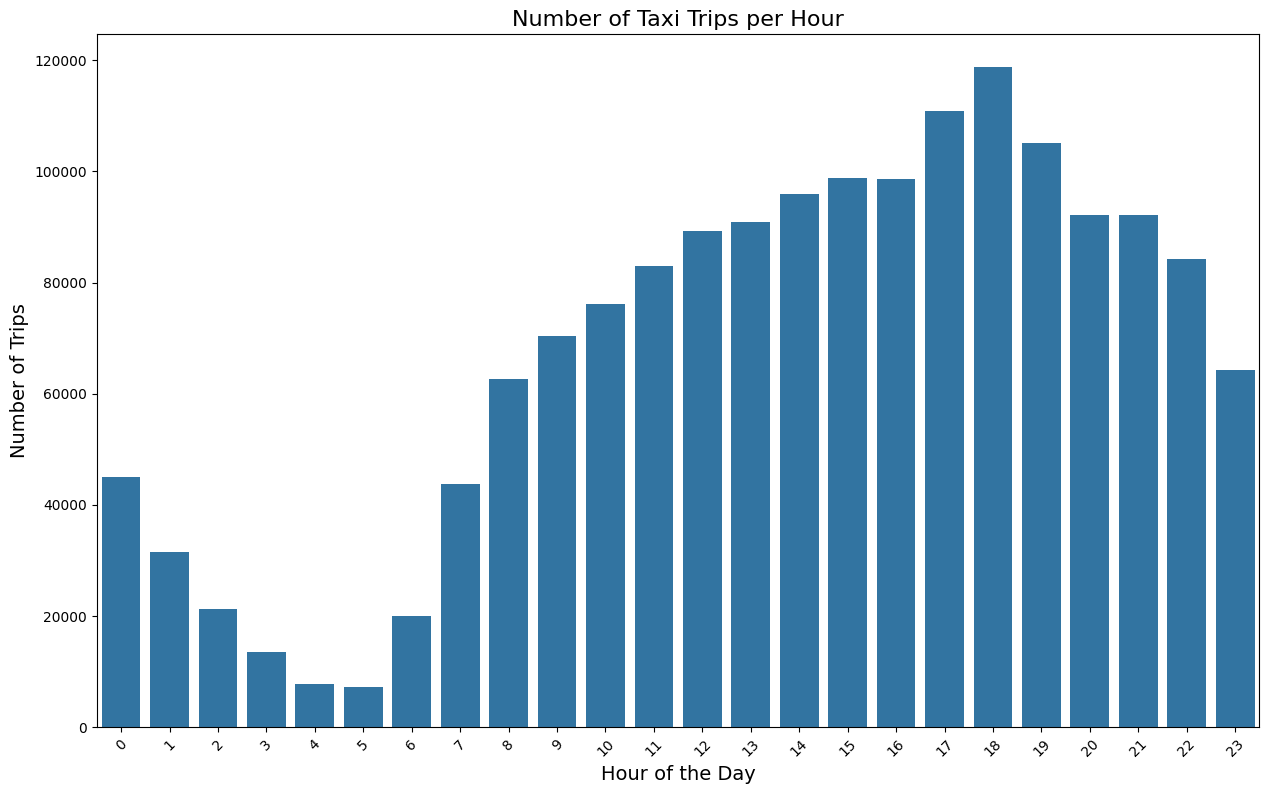

The busiest hour is : 18


In [191]:
# Visualise the number of trips per hour and find the busiest hour
hour_trips = mergeddata.groupby('pickup_hour').size()

plt.figure(figsize=(15, 9))
sns.barplot(x=hour_trips.index, y=hour_trips.values)
plt.title('Number of Taxi Trips per Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.show()

busyhour = hour_trips.idxmax()

print("The busiest hour is :",busyhour)


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [192]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
fraction = 0.05 # Sampling fraction (we took 5% of the trips)

top5 = hour_trips.nlargest(5)

scaled_top5 = top5 * (1 / fraction)

print("Number of trips in the five busiest hours:",scaled_top5)



Number of trips in the five busiest hours: pickup_hour
18    2374640.0
17    2218780.0
19    2102820.0
15    1976940.0
16    1972980.0
dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

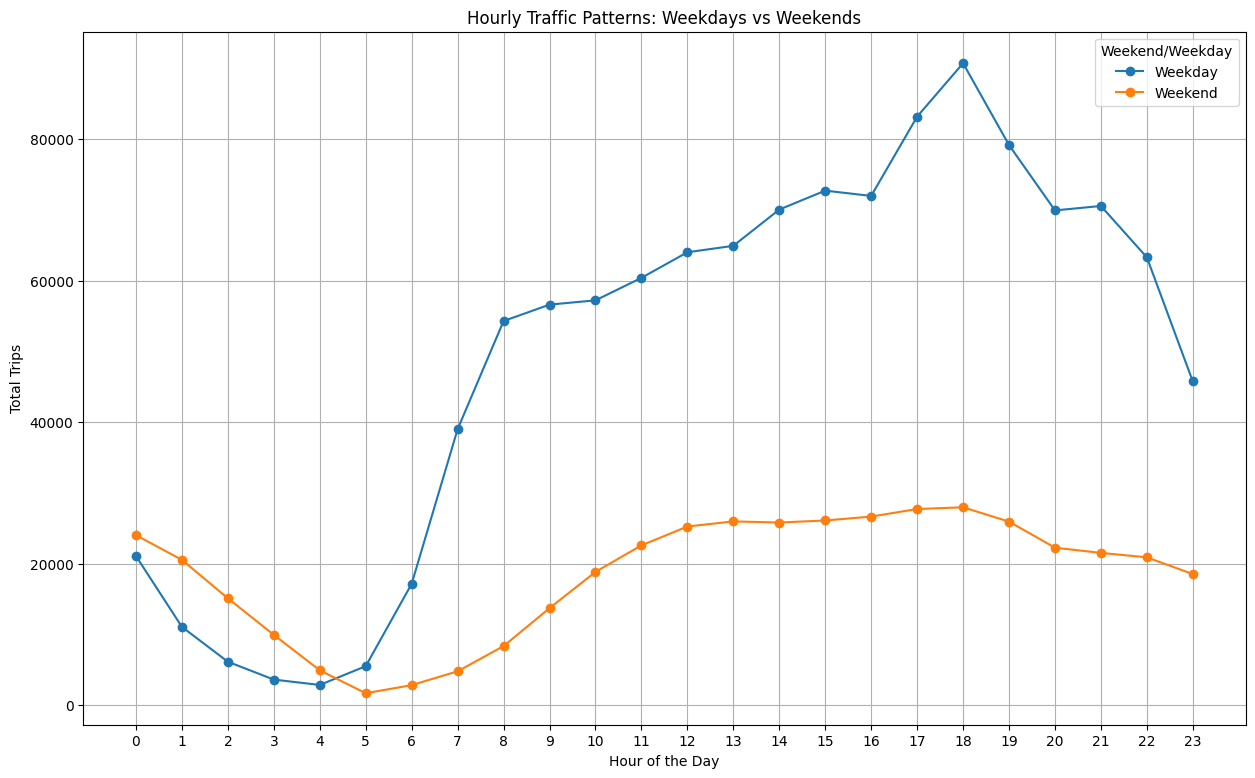

In [193]:
# Compare traffic trends for the week days and weekends

mergeddata['day_type'] = mergeddata['pickup_day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

hourtraffic = mergeddata.groupby(['day_type','pickup_hour']).size().unstack(0)

hourtraffic.plot(kind='line', figsize=(15, 9), marker='o')
plt.title('Hourly Traffic Patterns: Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Weekend/Weekday')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

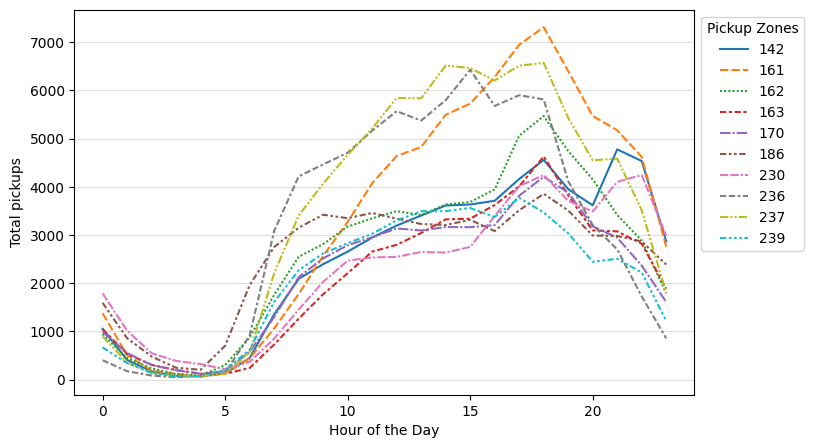

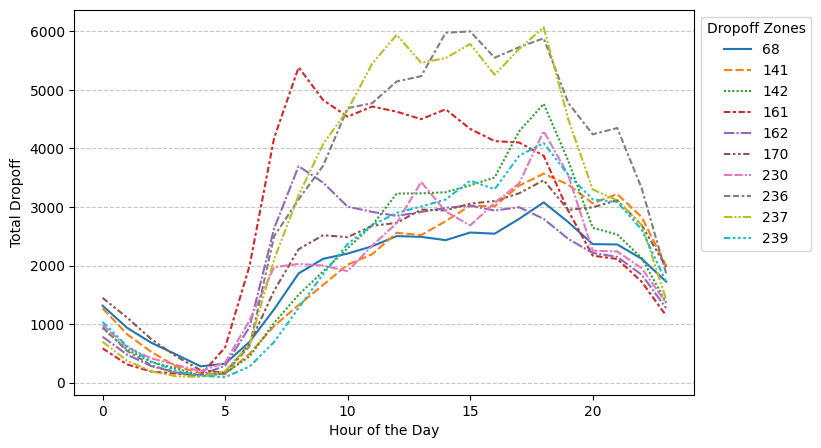

In [194]:
# Find top 10 pickup and dropoff zones


top10pick = mergeddata['PULocationID'].value_counts().head(10)
top10drop = mergeddata['DOLocationID'].value_counts().head(10)

pickup_hourly_trend = mergeddata[mergeddata['PULocationID'].isin(top10pick.index)].groupby(['pickup_hour','PULocationID']).size().unstack()
dropoff_hourly_trend = mergeddata[mergeddata['DOLocationID'].isin(top10drop.index)].groupby(['pickup_hour','DOLocationID']).size().unstack()

plt.figure(figsize=(8,5))
sns.lineplot(data = pickup_hourly_trend)
plt.xlabel('Hour of the Day')
plt.ylabel('Total pickups')
plt.legend(title = 'Pickup Zones',bbox_to_anchor = (1,1))
plt.grid(visible = True, axis = 'y',linestyle = '-',alpha = 0.4)
plt.show()

# Plot dropoff trends for the top 10 zones
plt.figure(figsize=(8,5))
sns.lineplot(data = dropoff_hourly_trend)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Dropoff')
plt.legend(title = 'Dropoff Zones',bbox_to_anchor = (1,1))
plt.grid(visible = True, axis = 'y',linestyle = '--',alpha = 0.7)
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

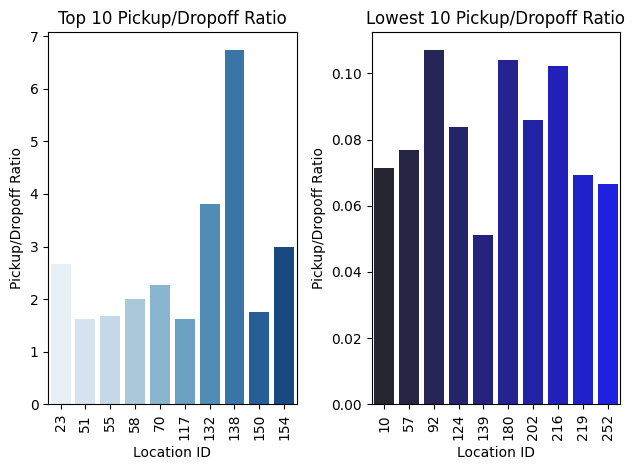

In [195]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = mergeddata['PULocationID'].value_counts()
dropoff_counts = mergeddata['DOLocationID'].value_counts()

#Creating a df capturing the pickup and dropoff counts
zone_ratio = pd.DataFrame({'Pickups':pickup_counts, 'Dropoffs':dropoff_counts})
#Rows where there is no pickup of dropoff location is mentioned, will be replaced with 1
zone_ratio.fillna(1,inplace=True)
#Calculating the ratio
zone_ratio['Pickup/Dropoff Ratio'] = zone_ratio['Pickups']/zone_ratio['Dropoffs']

highest_ratio = zone_ratio.sort_values(by='Pickup/Dropoff Ratio',ascending=False).head(10)
lowest_ratio = zone_ratio.sort_values(by='Pickup/Dropoff Ratio',ascending=True).head(10)

#Barplot for Top 10 Pickups
plt.subplot(1,2,1)
sns.barplot(x=highest_ratio.index,y=highest_ratio['Pickup/Dropoff Ratio'],palette = 'Blues')
plt.xticks(rotation=90)
plt.xlabel('Location ID')
plt.ylabel('Pickup/Dropoff Ratio')
plt.title('Top 10 Pickup/Dropoff Ratio')


#Barplot for Bottom 10 Pickups
plt.subplot(1,2,2)
sns.barplot(x=lowest_ratio.index,y=lowest_ratio['Pickup/Dropoff Ratio'],palette = 'dark:blue')
plt.xticks(rotation=90)
plt.xlabel('Location ID')
plt.ylabel('Pickup/Dropoff Ratio')
plt.title('Lowest 10 Pickup/Dropoff Ratio')

plt.tight_layout()
plt.show()





**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [196]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

nighthours = mergeddata[(mergeddata['pickup_hour'] >= 23) | (mergeddata['pickup_hour'] <= 5)]

nightpickupcount = nighthours.groupby('PULocationID').size().reset_index(name='pickup_count_night')
nightdropoffcount = nighthours.groupby('DOLocationID').size().reset_index(name='dropoff_count_night')

nightactivity = pd.merge(nightpickupcount, nightdropoffcount, left_on='PULocationID', right_on='DOLocationID', how='outer')


nightactivity['pickup_to_dropoff_ratio_night'] = nightactivity['pickup_count_night'] / nightactivity['dropoff_count_night']

highest_ratios_night = nightactivity.sort_values(by='pickup_to_dropoff_ratio_night', ascending=False).head(10)
lowest_ratios_night = nightactivity.sort_values(by='pickup_to_dropoff_ratio_night', ascending=True).head(10)

print("Top 10 Zones with Highest Pickup to Dropoff Ratio during Night Hours (11 PM to 5 AM):")
print(highest_ratios_night[['PULocationID', 'pickup_to_dropoff_ratio_night']])

print("\nTop 10 Zones with Lowest Pickup to Dropoff Ratio during Night Hours (11 PM to 5 AM):")
print(lowest_ratios_night[['PULocationID', 'pickup_to_dropoff_ratio_night']])


Top 10 Zones with Highest Pickup to Dropoff Ratio during Night Hours (11 PM to 5 AM):
     PULocationID  pickup_to_dropoff_ratio_night
118         138.0                       7.574803
112         132.0                       4.986807
45           55.0                       4.000000
96          114.0                       3.404697
98          117.0                       3.000000
79           91.0                       3.000000
159         182.0                       2.666667
220         249.0                       2.497268
128         148.0                       2.161711
59           70.0                       2.095745

Top 10 Zones with Lowest Pickup to Dropoff Ratio during Night Hours (11 PM to 5 AM):
     PULocationID  pickup_to_dropoff_ratio_night
119         139.0                       0.017857
190         218.0                       0.034884
104         124.0                       0.041667
7            10.0                       0.042945
191         219.0                       0.05

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [197]:
# Filter for night hours (11 PM to 5 AM)

nighthours = mergeddata[(mergeddata['pickup_hour'] >= 23) | (mergeddata['pickup_hour'] <= 5)]

# Filter for daytime hours (6 AM to 10 PM)
dayhours = mergeddata[(mergeddata['pickup_hour'] >= 6) & (mergeddata['pickup_hour'] <= 22)]

nightrevenue = nighthours['total_amount'].sum()

dayrevenue = dayhours['total_amount'].sum()

totalrevenue = mergeddata['total_amount'].sum()

nightshare = (nightrevenue / totalrevenue) * 100
dayshare = (dayrevenue / totalrevenue) * 100

print("Revenue share for Nighttime (11 PM to 5 AM):", nightshare)
print("Revenue share for Daytime (6 AM to 10 PM):", dayshare)

Revenue share for Nighttime (11 PM to 5 AM): 11.904884547445976
Revenue share for Daytime (6 AM to 10 PM): 88.09511545255401


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [198]:
# Analyse the fare per mile per passenger for different passenger counts

positive['fare_per_mile_per_passenger'] = positive['fare_amount'] / (positive['trip_distance'] * positive['passenger_count'])
#Groupby the passenger count to find the mean of the fare per mile per passenger
fare = positive.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
fare

passenger_count  fare_per_mile_per_passenger
0              1.0                    11.056690
1              2.0                     6.431487
2              3.0                     3.907755
3              4.0                     4.428906
4              5.0                     1.709614
5              6.0                     1.350658

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [199]:
# Compare the average fare per mile for different days and for different times of the day

positive['fare_per_mile'] = positive['fare_amount'] / positive['trip_distance']

positive['pickup_hour'] = positive['tpep_pickup_datetime'].dt.hour
positive['pickup_day_of_week'] = positive['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

hourlyaverage = positive.groupby('pickup_hour')['fare_per_mile'].mean()

dayaverage = positive.groupby('pickup_day_of_week')['fare_per_mile'].mean()

print("Average Fare per Mile by Hour of the Day:") 
print(hourlyaverage)

print("\nAverage Fare per Mile by Day of the Week:")
print(dayaverage)

Average Fare per Mile by Hour of the Day:
pickup_hour
0     10.536993
1     11.313293
2      9.830957
3     10.918818
4     14.047622
5     14.336434
6     11.323537
7     10.339623
8     10.432514
9     10.407735
10    13.202451
11    11.008384
12    12.107526
13    12.068781
14    11.764969
15    12.571935
16    13.993507
17    12.000975
18    11.583681
19    11.647411
20     9.611628
21     9.544702
22    10.180115
23    10.746083
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Day of the Week:
pickup_day_of_week
0    11.033075
1    12.215362
2    11.146903
3    11.295728
4    10.948223
5    10.955270
6    12.645755
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [201]:
# Compare fare per mile for different vendors
positive['fare_per_mile'] = positive['fare_amount'] / positive['trip_distance']

positive['pickup_hour'] = positive['tpep_pickup_datetime'].dt.hour

hourlyaverage = positive.groupby(['pickup_hour'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Hour:")
print(hourlyaverage)


Average Fare per Mile by Vendor and Hour:
    pickup_hour  fare_per_mile
0             0      10.536993
1             1      11.313293
2             2       9.830957
3             3      10.918818
4             4      14.047622
5             5      14.336434
6             6      11.323537
7             7      10.339623
8             8      10.432514
9             9      10.407735
10           10      13.202451
11           11      11.008384
12           12      12.107526
13           13      12.068781
14           14      11.764969
15           15      12.571935
16           16      13.993507
17           17      12.000975
18           18      11.583681
19           19      11.647411
20           20       9.611628
21           21       9.544702
22           22      10.180115
23           23      10.746083


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [202]:
# Defining distance tiers

positive['distance_tier'] = pd.cut(positive["trip_distance"],bins=[0, 2, 5, float("inf")])

positive['fare_per_mile'] = positive['fare_amount'] / positive['trip_distance']

averagebyvendor = positive.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Distance Tier:")
print(averagebyvendor)

Average Fare per Mile by Vendor and Distance Tier:
   VendorID distance_tier  fare_per_mile
0         1    (0.0, 2.0]      10.714217
1         1    (2.0, 5.0]       6.374142
2         1    (5.0, inf]       4.418062
3         2    (0.0, 2.0]      17.925673
4         2    (2.0, 5.0]       6.548805
5         2    (5.0, inf]       4.502212


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [205]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
positive["tip_percentage"] = (positive["tip_amount"] / positive["total_amount"]) * 100

#tip percentage by distances
averagetipdistance = positive.groupby("distance_tier")["tip_percentage"].mean().reset_index()
print(averagetipdistance)

#tip percentage by passenger counts
averagetippassenger = positive.groupby("passenger_count")["tip_percentage"].mean().reset_index()
print(averagetippassenger)

#tip percentage by pickup times
averagetiphour = positive.groupby("pickup_hour")["tip_percentage"].mean().reset_index()
print(averagetiphour)


  distance_tier  tip_percentage
0    (0.0, 2.0]       12.154693
1    (2.0, 5.0]       12.298656
2    (5.0, inf]       11.315353
   passenger_count  tip_percentage
0              1.0       12.175880
1              2.0       11.787278
2              3.0       11.356973
3              4.0       10.491979
4              5.0       12.133528
5              6.0       12.211439
    pickup_hour  tip_percentage
0             0       12.006659
1             1       11.968455
2             2       11.793440
3             3       11.335589
4             4       10.422829
5             5       10.208735
6             6       11.088328
7             7       11.927625
8             8       12.265060
9             9       12.081339
10           10       11.802906
11           11       11.807361
12           12       11.806705
13           13       11.768418
14           14       11.824976
15           15       11.802578
16           16       11.839590
17           17       12.134946
18           18    

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [210]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

lowtip = positive[positive['tip_percentage'] < 10]  # Trips with tip percentage < 10%
hightip = positive[positive['tip_percentage'] > 25]  # Trips with tip percentage > 25%

# Compare trip distances
averagelowtip = lowtip['trip_distance'].mean()
averagehightip = hightip['trip_distance'].mean()
print('Low tip average is:',averagelowtip)
print('High tip average is:',averagehightip)

# Compare passenger counts
lowtippassengercount = lowtip['passenger_count'].mean()
hightippassengercount = hightip['passenger_count'].mean()
print('Passenger Count for low tip:', lowtippassengercount)
print('Passenger Count for low tip:', hightippassengercount)

Low tip average is: 3.7885754498979938
High tip average is: 2.342700218315523
Passenger Count for low tip: 1.4191452361055192
Passenger Count for low tip: 1.3902102723198897


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [211]:
# See how passenger count varies across hours and days

hourlypassenger = positive.groupby('pickup_hour')['passenger_count'].mean()

daypassenger = positive.groupby('pickup_day_of_week')['passenger_count'].mean()

print("Hourly passenger count:", hourlypassenger)

print("Daywise passenger count:", daypassenger)


Hourly passenger count: pickup_hour
0     1.434014
1     1.439250
2     1.456307
3     1.460120
4     1.407699
5     1.299833
6     1.260175
7     1.282368
8     1.299795
9     1.323560
10    1.362110
11    1.372765
12    1.389730
13    1.393459
14    1.400363
15    1.418126
16    1.414418
17    1.399883
18    1.385437
19    1.397202
20    1.405106
21    1.433303
22    1.434926
23    1.428345
Name: passenger_count, dtype: float64
Daywise passenger count: pickup_day_of_week
0    1.367565
1    1.338974
2    1.335394
3    1.349271
4    1.407841
5    1.488344
6    1.472663
Name: passenger_count, dtype: float64


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [213]:
# How does passenger count vary across zones

passengerbyzone = positive.groupby('PULocationID')['passenger_count'].sum().reset_index()

passengerbyzone = passengerbyzone.sort_values(by='passenger_count', ascending=False)

print(passengerbyzone)

     PULocationID  passenger_count
124           132         141338.0
153           161         117454.0
226           237         114592.0
225           236         102294.0
219           230          89819.0
..            ...              ...
107           115              1.0
26             27              1.0
164           172              1.0
82             84              1.0
148           156              1.0

[254 rows x 2 columns]


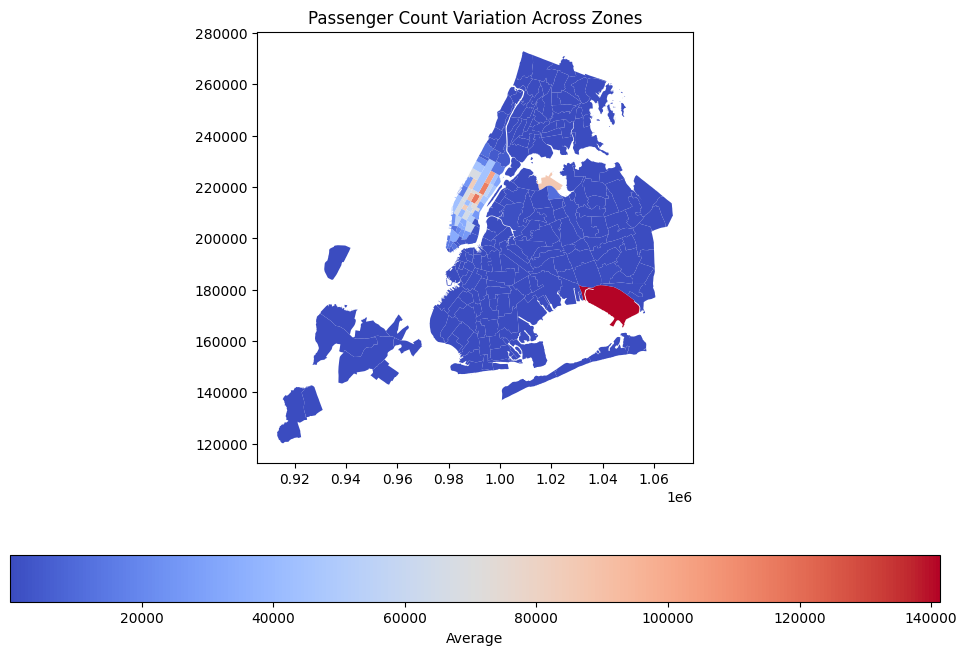

In [214]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones = zones.merge(passengerbyzone, left_on="LocationID", right_on="PULocationID", how="left")

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones.plot(column="passenger_count", cmap="coolwarm", legend=True, legend_kwds={"label": "Average", "orientation": "horizontal"}, ax=ax)
plt.title("Passenger Count Variation Across Zones")
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

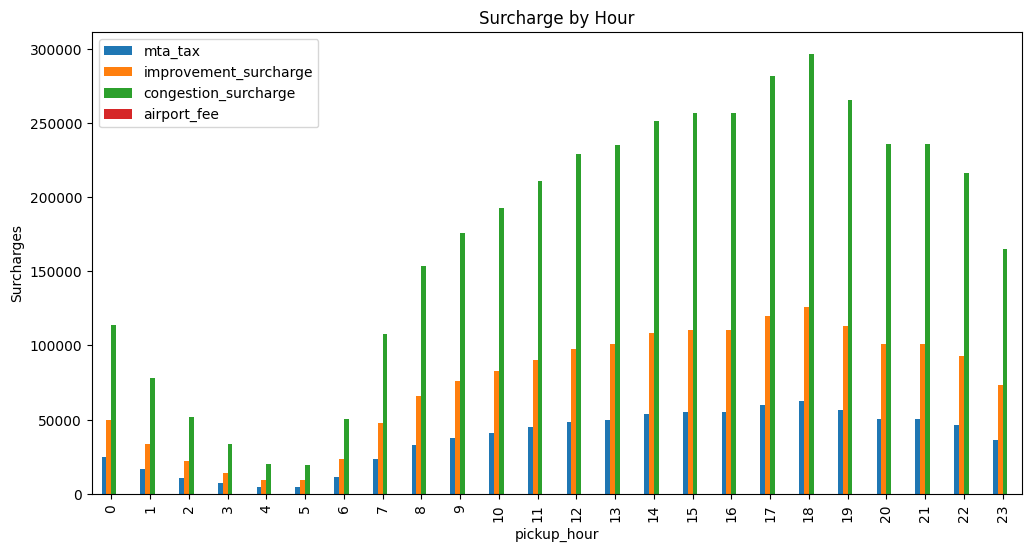

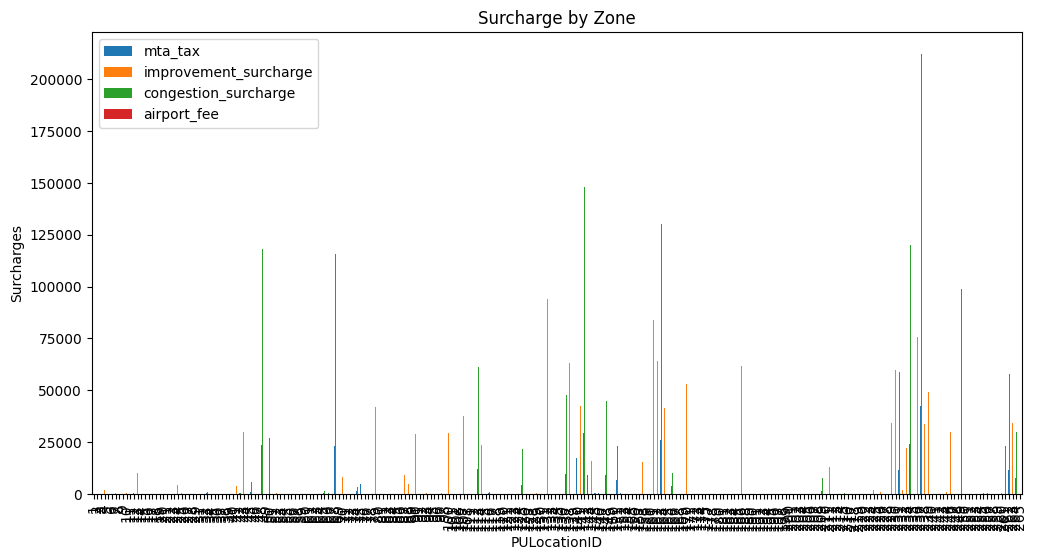

In [217]:
# How often is each surcharge applied?

surcharge = ['mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee'] # List of surcharge columns to check

positive['pickup_hour'] = positive['tpep_pickup_datetime'].dt.hour
hourly = positive.groupby('pickup_hour')[surcharge].sum()

hourly.plot(kind='bar', figsize=(12, 6), title="Surcharge by Hour")
plt.ylabel('Surcharges')
plt.show()

zonal = positive.groupby('PULocationID')[surcharge].sum()

zonal.plot(kind='bar', figsize=(12, 6), title="Surcharge by Zone")
plt.ylabel('Surcharges')
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [221]:
print('Utlize taxi staff based on top 10 pickup and dropoff distributions.')
print('Regular customers can be offered weekly, monthly and yearly passes based on data to attract more customers.')
print('Mondays and Tuesdays may have more idle staff whereas Saturdays and Sundays will have busy staff, so incentivize drivers accordingly.')


Utlize taxi staff based on top 10 pickup and dropoff distributions.
Regular customers can be offered weekly, monthly and yearly passes based on data to attract more customers.
Mondays and Tuesdays may have more idle staff whereas Saturdays and Sundays will have busy staff, so incentivize drivers accordingly.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [222]:
print('Assign staff based on hourly times for example zone 79 has great demand from 11 AM to 5 PM.')
print('Analyze demand at the busiest hour of the day which is 18:00 hour.')
print('Weekends have more rides and hence staffing must be done accordingly to avoid idle riders.')

Assign staff based on hourly times for example zone 79 has great demand from 11 AM to 5 PM.
Analyze demand at the busiest hour of the day which is 18:00 hour.
Weekends have more rides and hence staffing must be done accordingly to avoid idle riders.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [223]:
print('Awards free miles based on distance to retain long distance customers')
print('Provide city tour services based on pickup and drop off locations, city centres for an additional charge')
print('Reduce pricing for short distance trips for zones that are busy and have high demand')
print('Higher fares based on the number of passenger because sharing fares is not a problem for most customers.')

Awards free miles based on distance to retain long distance customers
Provide city tour services based on pickup and drop off locations, city centres for an additional charge
Reduce pricing for short distance trips for zones that are busy and have high demand
Higher fares based on the number of passenger because sharing fares is not a problem for most customers.
